# ГЛАВНАЯ ЧАСТЬ ПРЕДОБРАБОТКИ ДАННЫХ

In [6]:
import pandas as pd
import glob
import numpy as np
import os.path
import random
from collections import defaultdict
tegs = ['Дни недели','Время суток',
      'Лайки','Репосты','Комментарии','Просмотры','ER',
      'Подписчики','Дни недели/объем текста',
      'Время суток/объем текста','Количество по длине текста',
      'ER по длине текста','Количество по типу контента','ER по типу контента',
      'Количество публикаций','Хештеги','Хештеги/ER',
      'Относительная активность дни недели/объем текста',
      'Относительная активность время суток/объем текста',
      'Относительная активность по типу контента',
      'Относительная активность по длине текста',
      'Относительная активность по хештегам']
tegs_pd = pd.DataFrame(tegs)

tegs_extra = ['Относительная активность дни недели/объем текста',
      'Относительная активность время суток/объем текста',]
tegs_extra_pd = pd.DataFrame(tegs_extra)

tegs_full = ['Сравнительная таблица','Дни недели','Время суток',
      'Лайки','Репосты','Комментарии','Просмотры','ER',
      'Подписчики','Дни недели/объем текста',
      'Время суток/объем текста','Количество по длине текста',
      'ER по длине текста','Количество по типу контента','ER по типу контента',
      'Количество публикаций','Хештеги','Хештеги/ER',
      'Относительная активность дни недели/объем текста',
      'Относительная активность время суток/объем текста',
      'Относительная активность по типу контента',
      'Относительная активность по длине текста',
      'Относительная активность по хештегам']
tegs_full_pd=pd.DataFrame(tegs_full)

m=0;n=0
df_1=pd.DataFrame();df_2=pd.DataFrame();df_3=pd.DataFrame();df_4=pd.DataFrame();df_5=pd.DataFrame()
df_6=pd.DataFrame();df_7=pd.DataFrame();df_8=pd.DataFrame();df_9=pd.DataFrame();df_10=pd.DataFrame()
df_11=pd.DataFrame();df_12=pd.DataFrame();df_13=pd.DataFrame();df_14=pd.DataFrame();df_15=pd.DataFrame()
df_16=pd.DataFrame();df_17=pd.DataFrame();df_18=pd.DataFrame();df_19=pd.DataFrame();df_20=pd.DataFrame()
df_21=pd.DataFrame();df_22=pd.DataFrame();df_23=pd.DataFrame()

day_week=['Пн','Вт','Ср','Чт','Пт','Сб','Вс']
day_week_pd=pd.DataFrame(day_week)
day_week_pd=day_week_pd.T

def record_excel(df,str):
    writer = pd.ExcelWriter(str + '.xlsx', engine='xlsxwriter')
    df.to_excel(writer, sheet_name='Sheet2')
    writer.save()

# Формирование фреймов данных по характеристикам (признакам)

In [7]:
path = 'D:\Projects_for_my_science_work\Article_1_classification\data_of_community\data_vk\Vk_data_all_type_test_3'
num_files = len([f for f in os.listdir(path)
                if os.path.isfile(os.path.join(path, f))])
print(num_files)

count_file=0
for f in glob.glob('D:\Projects_for_my_science_work\Article_1_classification\data_of_community\data_vk\Vk_data_all_type_test_3\*.xlsx'):
    print(f)
    count_file=count_file+1
    df = pd.read_excel(f, index_col=None, header=None, usecols=None)

    # 1. СЧИТЫВАНИЕ И СРАЗУ ЖЕ ОБРАБАТЫВАНИЕ ФАЙЛА БЕЗ ПРОПУСКОВ
    df.iloc[1][0]=df.iloc[0][0]
    df.iloc[0][0]=None
    print(len(df.index))
    for j in range(0,len(tegs_pd)):
         for i in range(0,len(df.index)-1):
            if df.iloc[i][0]==tegs_pd.iloc[j][0]:
                df.iloc[i+1][0]=df.iloc[i][0]
                df.iloc[i][0]=None
                break
    df.dropna(how='all', inplace=True)
    # 2. Определение количества выгруженных сообществ в каждом отдельном файле

    ind_fin=pd.DataFrame(np.where(df[0]=='Дни недели'))-pd.DataFrame(np.where(df[0]=='Сравнительная таблица'))-1
    # копирую dataframe
    df_new=df.copy()
    df_new=df_new.replace({np.nan: None})

    # 3. Нормализация формата вывода данных у двух признаков
    for i in range(0,len(df_new.index)-1):
        k=0
        if df_new.iloc[i][0]==tegs_extra_pd.iloc[0][0] or df_new.iloc[i][0]==tegs_extra_pd.iloc[1][0]:
            k=ind_fin.iloc[0][0]
            df_copy=pd.DataFrame(index=pd.RangeIndex(1),columns=pd.RangeIndex(k))
            print(k)
            for j in range(0,k):
                df_copy.iloc[0][j]=df_new.iloc[i][j+1]
                df_new.iloc[i][1]=None
            for j in range(0,k):
                df_new.iloc[i][j+2]=df_copy.iloc[0][j]
            for j in range(0,k):
                df_new.iloc[i][k+j+3]=df_copy.iloc[0][j]
            for j in range(0,k):
                df_new.iloc[i][2*k+j+4]=df_copy.iloc[0][j]

    ind_defer=pd.DataFrame(index=np.arange(len(tegs_full_pd.index)-1), columns=pd.RangeIndex(1))
    ind_defer=ind_defer.fillna(0)
    for i in range(1,len(tegs_full_pd.index)):
        ind_defer.iloc[i-1,:]=pd.DataFrame(np.where(df[0]==tegs_full_pd.iloc[i][0]))-pd.DataFrame(np.where(df[0]==tegs_full_pd.iloc[i-1][0]))-1
    ind_defer=ind_defer.transpose()
    print('ind_defer')
    print(ind_defer)

    #Алгоритм замены повторяющихся значений в названии сообществ
    def rename_duplicates ( ind_defer, df_new):
        for i in range( 0, ind_defer.iloc[0][0] - 1) :
            for j in range( i + 1, ind_defer.iloc[0][0]) :
                if df_new.iloc[i][0] == df_new.iloc[j][0] :
                    df_new.iloc[j][0] = str(df_new.iloc[j][0]) + '_' + str(j)
        return df_new
    def rename_duplicates_1 ( ind_defer, df_new):
        for i in range( 0, ind_defer.iloc[0][0] - 1) :
            for j in range( i + 1, ind_defer.iloc[0][0]) :
                if df_new.iloc[i][0] == df_new.iloc[j][0] :
                    df_new.iloc[j][0] = str(df_new.iloc[j][0]) + '_' + str(j-1)
        return df_new
    def rename_duplicates_2 ( df_new ):
        for i in range( 0, len( df_new.columns ) - 1) :
            for j in range( i + 1, len( df_new.columns )) :
                if df_new.iloc[0][i] == df_new.iloc[0][j] :
                    df_new.iloc[0][j] = str(df_new.iloc[0][j]) + '_' + str(j-1)
        return df_new
    def rename_duplicates_3 ( df_new ):
        for i in range( 0, len( df_new.columns ) - 1) :
            for j in range( i + 1, len( df_new.columns ) ) :
                if df_new.iloc[0][i] == df_new.iloc[0][j] :
                    df_new.iloc[0][j] = str(df_new.iloc[0][j]) + '_' + str(j)
        return df_new

    #Функции для обработки различных признаков
    def func_1( i , j, df_new, ind_defer, df ) :
        cut = df_new.iloc[ i : i + ind_defer.iloc[0][j] + 1,].to_numpy()
        cut = pd.DataFrame( cut )
        cut = rename_duplicates( ind_defer, cut)
        df = df.append( cut )
        return df
    def func_1_1( i , j, df_new, ind_defer, df, num_files, count_file ) :
        cut = df_new.iloc[ i + 1 : i + ind_defer.iloc[0][j] + 1,].to_numpy()
        cut = pd.DataFrame( cut )
        cut = rename_duplicates( ind_defer, cut )
        df = df.append( cut )
        if count_file == num_files:
            df = df.drop_duplicates(subset=[0], ignore_index=True)
            df = df.to_numpy()
            df = pd.DataFrame(df)
        return df
    def func_2 (i , j, df_new, ind_defer, df) :
        cut = df_new.iloc[ i : i + ind_defer.iloc[0][j] + 1, ].to_numpy()
        cut = cut.T
        cut = np.delete( cut, (0), axis=0 )
        cut = pd.DataFrame( cut )
        cut.dropna( how='all', inplace=True )
        cut = rename_duplicates( ind_defer, cut)
        df = df.append(cut)
        df = df.drop_duplicates(subset=[0], ignore_index=True)
        return df
    def func_3 (i , j, df_new, ind_defer, df, num_files, count_file) :
        cut = df_new.iloc[ i : i + ind_defer.iloc[0][j] + 1, ].to_numpy()
        cut = pd.DataFrame( cut )
        cut.dropna( how='all', axis=1, inplace=True )
        cut = rename_duplicates_2( cut )
        df = df.merge( cut, on=0, how='outer' )
        if count_file == num_files:
            df = df.T
            df = df.to_numpy()
            df = pd.DataFrame(df)
            df = df.drop_duplicates(subset=[0], ignore_index=True)
            df = df.T
            df = df.to_numpy()
            df = pd.DataFrame(df)
        return df
    def func_4 (i , j, df_new, ind_defer, df, num_files, count_file) :
        cut = df_new.iloc[ i : i + ind_defer.iloc[0][j] + 1, ].to_numpy()
        cut = cut.T
        cut = pd.DataFrame(cut)
        index_len=len(cut.columns)-1

        add_10 = pd.DataFrame(index = np.arange(ind_defer.iloc[0][0]+2), columns = pd.RangeIndex(len(cut.columns)*3-2))
        add_10_1 = pd.DataFrame(index = np.arange(ind_defer.iloc[0][0]+2), columns = pd.RangeIndex(len(cut.columns)))
        add_10_2 = pd.DataFrame(index = np.arange(ind_defer.iloc[0][0]+2), columns = pd.RangeIndex(len(cut.columns)))
        add_10_3 = pd.DataFrame(index = np.arange(ind_defer.iloc[0][0]+2), columns = pd.RangeIndex(len(cut.columns)))

        a = cut.iloc[ (2 + ind_defer.iloc[0][0]) : (3 + 2*ind_defer.iloc[0][0]),]
        b = cut.iloc[ (2 + 2*ind_defer.iloc[0][0] + 1) : (3 + 3*ind_defer.iloc[0][0] + 1),]
        c = cut.iloc[ (0) : (2 + ind_defer.iloc[0][0]),]
        a = a.to_numpy()
        b = b.to_numpy()
        c = c.to_numpy()
        a = pd.DataFrame(a)
        b = pd.DataFrame(b)
        c = pd.DataFrame(c)

        add_10_1=add_10_1.append(c)
        add_10_1.dropna(how='all', inplace=True)
        for p in range(0,index_len):
            add_10_2.iloc[0][1+p] = add_10_1.iloc[0][1+p]
            add_10_3.iloc[0][1+p] = add_10_1.iloc[0][1+p]

        add_10_2=add_10_2.append(a)
        add_10_3=add_10_3.append(b)
        add_10=add_10.append(add_10_1)

        add_10_2.dropna(how='all', inplace=True)
        add_10_3.dropna(how='all', inplace=True)
        add_10.dropna(how='all', inplace=True)

        add_10 = add_10.to_numpy()
        add_10_2 = add_10_2.to_numpy()
        add_10_3 = add_10_3.to_numpy()
        add_10 = pd.DataFrame(add_10)
        add_10_2 = pd.DataFrame(add_10_2)
        add_10_3 = pd.DataFrame(add_10_3)

        for m in range(0,ind_defer.iloc[0][0]+2):
            for w in range(0,index_len):
                add_10.iloc[m][w+index_len+1] = add_10_2.iloc[m][w+1]
                add_10.iloc[m][w+2*index_len+1] = add_10_3.iloc[m][w+1]

        add_10 = add_10.drop( [0,1] )
        add_10 = rename_duplicates( ind_defer, add_10)
        df = df.append(add_10)
        if count_file == num_files:
            df = df.drop_duplicates(subset=[0], ignore_index=True)
            df = df.to_numpy()
            df = pd.DataFrame(df)
        return df
    def func_4_1 (i , j, df_new, ind_defer, df) :
        cut = df_new.iloc[ i : i + ind_defer.iloc[0][j] + 1, ].to_numpy()
        cut = cut.T
        cut = pd.DataFrame(cut)
        index_len=len(cut.columns)-1

        add_10 = pd.DataFrame(index = np.arange(ind_defer.iloc[0][0]+2), columns = pd.RangeIndex(len(cut.columns)*3-2))
        add_10_1 = pd.DataFrame(index = np.arange(ind_defer.iloc[0][0]+2), columns = pd.RangeIndex(len(cut.columns)))
        add_10_2 = pd.DataFrame(index = np.arange(ind_defer.iloc[0][0]+2), columns = pd.RangeIndex(len(cut.columns)))
        add_10_3 = pd.DataFrame(index = np.arange(ind_defer.iloc[0][0]+2), columns = pd.RangeIndex(len(cut.columns)))

        a = cut.iloc[ (2 + ind_defer.iloc[0][0]) : (3 + 2*ind_defer.iloc[0][0]),]
        b = cut.iloc[ (2 + 2*ind_defer.iloc[0][0] + 1) : (3 + 3*ind_defer.iloc[0][0] + 1),]
        c = cut.iloc[ (0) : (2 + ind_defer.iloc[0][0]),]
        a = a.to_numpy()
        b = b.to_numpy()
        c = c.to_numpy()
        a = pd.DataFrame(a)
        b = pd.DataFrame(b)
        c = pd.DataFrame(c)

        add_10_1=add_10_1.append( c )
        add_10_1.dropna( how = 'all', inplace = True )
        for p in range(0,index_len):
            add_10_2.iloc[0][1+p] = add_10_1.iloc[0][1+p]
            add_10_3.iloc[0][1+p] = add_10_1.iloc[0][1+p]

        add_10_2=add_10_2.append(a)
        add_10_3=add_10_3.append(b)
        add_10=add_10.append(add_10_1)

        add_10_2.dropna( how = 'all', inplace = True )
        add_10_3.dropna( how = 'all', inplace = True )
        add_10.dropna( how = 'all', inplace = True )

        add_10 = add_10.to_numpy()
        add_10_2 = add_10_2.to_numpy()
        add_10_3 = add_10_3.to_numpy()
        add_10 = pd.DataFrame(add_10)
        add_10_2 = pd.DataFrame(add_10_2)
        add_10_3 = pd.DataFrame(add_10_3)

        for m in range(0,ind_defer.iloc[0][0]+2):
            for w in range(0,index_len):
                add_10.iloc[m][w+index_len+1] = add_10_2.iloc[m][w+1]
                add_10.iloc[m][w+2*index_len+1] = add_10_3.iloc[m][w+1]

        add_10 = rename_duplicates_1( ind_defer, add_10)
        df = df.append(add_10)
        df = df.to_numpy()
        df = pd.DataFrame(df)
        return df
    def func_5 (i , j, df_new, ind_defer, df) :
        cut = df_new.iloc[ i : i + ind_defer.iloc[0][j] + 1, ].to_numpy()
        cut = cut.T
        cut = pd.DataFrame( cut )
        cut = cut.replace({np.nan: None})
        cut.dropna( how = 'all', inplace = True)
        df.dropna( how = 'all', inplace = True)
        cut = rename_duplicates( ind_defer, cut)
        df = df.append( cut )
        return df
    def func_6 (i , j, df_new, ind_defer, df) :
        cut = df_new.iloc[ i : i + ind_defer.iloc[0][j] + 1, ].to_numpy()
        cut = pd.DataFrame(cut)
        cut.dropna ( how = 'all', axis = 1, inplace=True )
        cut = rename_duplicates_3 ( cut )
        df = df.append ( cut )
        return df
    def func_7 (i , j, df_new, ind_defer, df) :
        cut = df_new.iloc[ i : i + ind_defer.iloc[0][j] + 1, ].to_numpy()
        cut = cut.T
        cut = pd.DataFrame( cut )
        cut.dropna( how = 'all', inplace = True )
        cut = rename_duplicates( ind_defer, cut )
        df = df.append( cut )
        return df
    def func_8 (i , j, df_new, ind_defer, df) :
        cut = df_new.iloc[ i : i + ind_defer.iloc[0][j] + 1,].to_numpy()
        cut = pd.DataFrame( cut )
        cut.dropna( how = 'all', axis = 1, inplace = True )
        cut = rename_duplicates_3 ( cut )
        df = df.append( cut )
        return df

    for i in range( 0, len( df_new.index ) ) :
        for j in range( 0, len( tegs_full_pd.index ) ) :
            if df_new.iloc[i][0] == tegs_full_pd.iloc[j][0] :
                if count_file > 1 :
                    if j == 0:
                        df_1 = func_1_1 ( i, j, df_new, ind_defer, df_1, num_files, count_file )
                    if j == 1:
                        df_2 = func_2 ( i, j, df_new, ind_defer, df_2 )
                    if j == 2:
                        df_3 = func_2 ( i, j, df_new, ind_defer, df_3 )
                    if j == 3:
                        df_4 = func_3 ( i, j, df_new, ind_defer, df_4, num_files, count_file )
                    if j == 4:
                        df_5 = func_3 ( i, j, df_new, ind_defer, df_5, num_files, count_file )
                    if j == 5:
                        df_6 = func_3 ( i, j, df_new, ind_defer, df_6, num_files, count_file )
                    if j == 6:
                        df_7 = func_3 ( i, j, df_new, ind_defer, df_7, num_files, count_file )
                    if j == 7:
                        df_8 = func_3 ( i, j, df_new, ind_defer, df_8, num_files, count_file )
                    if j == 8:
                        df_9 = func_3 ( i, j, df_new, ind_defer, df_9, num_files, count_file )
                    if j == 9:
                        df_10 = func_4 ( i, j, df_new, ind_defer, df_10, num_files, count_file )
                    if j == 10:
                        df_11 = func_4 ( i, j, df_new, ind_defer, df_11, num_files, count_file )
                    if j == 11:
                        df_12 = func_2 ( i, j, df_new, ind_defer, df_12 )
                    if j == 12:
                        df_13 = func_2 ( i, j, df_new, ind_defer, df_13 )
                    if j == 13:
                        df_14 = func_2 ( i, j, df_new, ind_defer, df_14 )
                    if j == 14:
                        df_15 = func_2 ( i, j, df_new, ind_defer, df_15 )
                    if j == 15:
                        df_16 = func_3 ( i, j, df_new, ind_defer, df_16, num_files, count_file )
                    if j == 16:
                        df_17 = func_3 ( i, j, df_new, ind_defer, df_17, num_files, count_file )
                    if j == 17:
                        df_18 = func_3 ( i, j, df_new, ind_defer, df_18, num_files, count_file )
                    if j == 18:
                        df_19 = func_4 ( i, j, df_new, ind_defer, df_19, num_files, count_file )
                    if j == 19:
                        df_20 = func_4 ( i, j, df_new, ind_defer, df_20, num_files, count_file )
                    if j == 20:
                        df_21 = func_2 ( i, j, df_new, ind_defer, df_21 )
                    if j == 21:
                        df_22 = func_2 ( i, j, df_new, ind_defer, df_22 )
                    if j == 22:
                        add_23 = df_new.iloc[i:len(df_new.index)+1,].to_numpy()
                        add_23 = pd.DataFrame(add_23)
                        add_23.dropna( how = 'all', axis = 1, inplace = True)
                        df_23=df_23.merge( add_23, on = 0, how = 'outer' )
                else:
                    if j == 0:
                        df_1 = func_1 ( i, j, df_new, ind_defer, df_1)
                    if j == 1:
                        df_2 = func_5 ( i, j, df_new, ind_defer, df_2)
                    if j == 2:
                        df_3 = func_5 ( i, j, df_new, ind_defer, df_3)
                    if j == 3:
                        df_4 = func_6 ( i, j, df_new, ind_defer, df_4)
                    if j == 4:
                        df_5 = func_6 ( i, j, df_new, ind_defer, df_5)
                    if j == 5:
                        df_6 = func_6 ( i, j, df_new, ind_defer, df_6)
                    if j == 6:
                        df_7 = func_6 ( i, j, df_new, ind_defer, df_7)
                    if j == 7:
                        df_8 = func_6 ( i, j, df_new, ind_defer, df_8)
                    if j == 8:
                        df_9 = func_6 ( i, j, df_new, ind_defer, df_9)
                    if j == 9:
                        df_10 = func_4_1 ( i, j, df_new, ind_defer, df_10 )
                    if j == 10:
                        df_11 = func_4_1 ( i, j, df_new, ind_defer, df_11 )
                    if j == 11:
                        df_12 = func_7 ( i, j, df_new, ind_defer, df_12 )
                    if j == 12:
                        df_13 = func_7 ( i, j, df_new, ind_defer, df_13 )
                    if j == 13:
                        df_14 = func_7 ( i, j, df_new, ind_defer, df_14 )
                    if j == 14:
                        df_15 = func_7 ( i, j, df_new, ind_defer, df_15 )
                    if j == 15:
                        df_16 = func_8 ( i, j, df_new, ind_defer, df_16 )
                    if j == 16:
                        df_17 = func_8 ( i, j, df_new, ind_defer, df_17 )
                    if j == 17:
                        df_18 = func_8 ( i, j, df_new, ind_defer, df_18 )
                    if j == 18:
                        df_19 = func_4_1 ( i, j, df_new, ind_defer, df_19 )
                    if j == 19:
                        df_20 = func_4_1 ( i, j, df_new, ind_defer, df_20 )
                    if j == 20:
                        df_21 = func_7 ( i, j, df_new, ind_defer, df_21 )
                    if j == 21:
                        df_22 = func_7 ( i, j, df_new, ind_defer, df_22 )
                    if j == 22:
                        add_2323 = df_new.iloc[i:len(df_new.index)+1,].to_numpy()
                        add_2323 = pd.DataFrame(add_2323)
                        add_2323.dropna( how = 'all', axis = 1, inplace = True)
                        df_23 = df_23.append( add_2323 )

3
D:\Projects_for_my_science_work\Article_1_classification\data_of_community\data_vk\Vk_data_all_type_test_3\charts_it.xlsx
3887
10
10
ind_defer
   0   1   2    3    4    5    6    7   8   9   ...  12  13  14   15   16  \
0  10   7  24  510  510  510  510  510  49   7  ...   3   4   4  510  100   

    17  18  19  20  21  
0  100   7  24   4   3  

[1 rows x 22 columns]
D:\Projects_for_my_science_work\Article_1_classification\data_of_community\data_vk\Vk_data_all_type_test_3\charts_makeup_care.xlsx
3955
10
10
ind_defer
   0   1   2    3    4    5    6    7    8   9   ...  12  13  14   15   16  \
0  10   7  24  510  510  510  510  510  379   7  ...   3   4   4  510  100   

    17  18  19  20  21  
0  100   7  24   4   3  

[1 rows x 22 columns]
D:\Projects_for_my_science_work\Article_1_classification\data_of_community\data_vk\Vk_data_all_type_test_3\charts_science_technology.xlsx
3867
10
10
ind_defer
   0   1   2    3    4    5    6    7   8   9   ...  12  13  14   15   16  \
0  10   7

In [12]:
record_excel(df_1,'df_1')
record_excel(df_2,'df_2')


# Формирование общего файла с характеристиками
# Фреймы без обработки или с лёгкой, присоединяются полностью

In [8]:
df_1.dropna( how = 'all', axis = 1, inplace = True )
df_1.iloc[0][0] = 'Cообщества'
def func_plus_type1( df, df_main ):
    df_n = df.copy()
    df_main_n = df_main.copy()
    for i in range( 1, len( df_n.columns ) ):
        df_n.iloc[0][i] = str( df_n.iloc[0][0] ) + ' ' + str( df_n.iloc[0][i] )
    df_n.iloc[0][0] = 'Cообщества'
    df_main_n = df_main_n.merge( df_n, on = 0, how = 'outer')
    df_main_n = df_main_n.to_numpy()
    df_main_n = pd.DataFrame( df_main_n )
    return df_main_n
def func_plus_type2( df, df_main ):
    df_n = df.copy()
    df_main_n = df_main.copy()
    for i in range(1,len(df_n.columns)):
        df_n.iloc[0][i] = str( df_n.loc[0][0] ) + ' ' + str( df_n.loc[0][i] ) + ' ' + str( df_n.loc[1][i] )
    df_n = df_n.drop( df_n.index[[1]] )
    df_n.iloc[0][0] = 'Cообщества'
    df_main_n = df_main_n.to_numpy()
    df_main_n = pd.DataFrame( df_main_n )
    df_main_n = df_main_n.merge( df_n, on = 0, how = 'outer' )
    df_main_n = df_main_n.to_numpy()
    df_main_n = pd.DataFrame( df_main_n )
    return df_main_n

In [9]:
char_2 = func_plus_type1( df_2, df_1 )
char_3 = func_plus_type1( df_3, char_2 )
char_10 = func_plus_type2( df_10, char_3 )
char_11 = func_plus_type2( df_11, char_10 )
char_12 = func_plus_type1( df_12, char_11 )
char_13 = func_plus_type1( df_13, char_12 )
char_14 = func_plus_type1( df_14, char_13 )
char_15 = func_plus_type1( df_15, char_14 )
char_19 = func_plus_type2( df_19, char_15 )
char_20 = func_plus_type2( df_20, char_19 )
char_21 = func_plus_type1( df_21, char_20 )
first_part_features = func_plus_type1( df_22, char_21 )

In [5]:
record_excel( first_part_features, 'first_part_features_test_std' )

# Фреймы c заполнением пропусков, присоединяются только обобщённые значения для каждого сообщества:

 ### 1. Средним значением стандартный метод
 ### 2. Медианой

## Методология:
#### 1. Пропуски заполняются по правилу

In [10]:
def connect_function( df_main, df_attached ):
    def row_1_func ( df_attached ):
        df_new = df_attached.iloc[ 0,: ]
        df_new = df_new.to_numpy()
        df_new = pd.DataFrame( df_new )
        return df_new
    def normalize_func ( df_attached ):
        df_attached.dropna(how = 'all', axis = 1, inplace=True)
        df_attached = df_attached.replace( {np.nan: None} )
        df_attached = df_attached.iloc[ 1 : len( df_attached.index ) , 1 : len( df_attached.columns ) ]
        df_attached = df_attached.to_numpy()
        df_attached = pd.DataFrame( df_attached )
        return df_attached
    def insert_value ( df_attached, df_col ):
        df_std = df_attached.std(axis = 0)
        for j in range( 0, len( df_attached.columns ) ):
            for i in range( 0,len( df_attached.index ) ):
                if df_attached.iloc[i][j] is None or df_attached.iloc[i][j] == 0:
                    df_attached.iloc[i][j] =  df_col.iloc[j][0] + random.uniform( -2, 2 ) * df_std.iloc[j]
        return df_attached
# 1. Mean_mean
    def func_mean_mean( df_main, df_attached ):
        df = normalize_func( df_attached )
        df_1_row = row_1_func( df_attached ).T

        df_copy_mean = df.copy()
        df4_mean = round( df.mean() )
        df4_mean = df4_mean.fillna( 0 )
        df4_mean = pd.DataFrame( df4_mean )
        y_full_mean = insert_value ( df_copy_mean, df4_mean )
        mean_mean = y_full_mean.mean()
        mean_mean = pd.DataFrame( mean_mean ).T
        char_mean_mean  = df_1_row.append( mean_mean )

        char_mean_mean = pd.concat( [char_mean_mean], ignore_index = True)
        m = char_mean_mean.iloc[ 1 , 0 : ( len(char_mean_mean.columns)-1 )].copy()
        m = m.to_numpy()
        m = pd.DataFrame( m )
        char_mean_mean.iloc[1][0] = str( char_mean_mean.iloc[0][0] ) + ' ' + 'mean mean'
        char_mean_mean.iloc[0][0] = 'Cообщества'
        for i in range( 1 , len( char_mean_mean.columns ) ):
            char_mean_mean.iloc[1][i] = round(m.iloc[i-1][0])
        char_mean_mean = char_mean_mean.T

        df_main = df_main.merge( char_mean_mean, on = 0, how = 'outer')
        return df_main
    df_main = func_mean_mean( df_main,df_attached )

# 2. Mean_median
    def func_mean_median( df_main, df_attached ):
        df = normalize_func( df_attached )
        df_1_row = row_1_func( df_attached ).T

        df_copy_mean = df.copy()
        df4_mean = round( df.mean() )
        df4_mean = df4_mean.fillna( 0 )
        df4_mean = pd.DataFrame( df4_mean )
        y_full_mean = insert_value ( df_copy_mean, df4_mean )
        mean_median = y_full_mean.median()
        mean_median = pd.DataFrame( mean_median ).T
        char_mean_median = df_1_row.append( mean_median )

        char_mean_median = pd.concat( [ char_mean_median ], ignore_index = True)
        m = char_mean_median.iloc[ 1 , 0 : ( len(char_mean_median.columns) - 1 ) ].copy()
        m = m.to_numpy()
        m = pd.DataFrame( m )
        char_mean_median.iloc[1][0] = str( char_mean_median.iloc[0][0] ) + ' ' + 'mean median'
        char_mean_median.iloc[0][0] = 'Cообщества'
        for i in range( 1, len( char_mean_median.columns ) ):
            char_mean_median.iloc[1][i] = round( m.iloc[i-1][0] )
        char_mean_median = char_mean_median.T

        df_main = df_main.merge( char_mean_median, on = 0, how = 'outer')
        return df_main
    df_main = func_mean_median( df_main, df_attached )

# 3. Median_Median
    def func_median_median( df_main, df_attached ):
        df = normalize_func( df_attached )
        df_1_row = row_1_func( df_attached ).T

        df_copy_mean = df.copy()
        df4_median = round( df.median() )
        df4_median = df4_median.fillna( 0 )
        df4_median = pd.DataFrame( df4_median )
        y_full_mean = insert_value ( df_copy_mean, df4_median )
        mean_median = y_full_mean.median()
        mean_median = pd.DataFrame( mean_median ).T
        char_mean_median = df_1_row.append( mean_median )

        char_mean_median = pd.concat( [ char_mean_median ], ignore_index = True)
        m = char_mean_median.iloc[ 1 , 0 : ( len( char_mean_median.columns ) - 1 ) ].copy()
        m = m.to_numpy()
        m = pd.DataFrame( m )
        char_mean_median.iloc[1][0] = str( char_mean_median.iloc[0][0] ) + ' ' + 'median median'
        char_mean_median.iloc[0][0] = 'Cообщества'
        for i in range( 1, len( char_mean_median.columns ) ):
            char_mean_median.iloc[1][i] = round( m.iloc[i-1][0] )
        char_mean_median = char_mean_median.T

        df_main = df_main.merge( char_mean_median, on = 0, how = 'outer' )
        return df_main
    df_main = func_median_median( df_main, df_attached )

# 4. Median_Mean
    def func_median_mean( df_main, df_attached ):
        df = normalize_func( df_attached )
        df_1_row = row_1_func( df_attached ).T

        df_copy_mean = df.copy()
        df4_median = round( df.median() )
        df4_median = df4_median.fillna( 0 )
        df4_median = pd.DataFrame( df4_median )

        y_full_mean = insert_value ( df_copy_mean,df4_median )
        mean_median=y_full_mean.mean()
        mean_median=pd.DataFrame( mean_median ).T
        char_mean_median=df_1_row.append( mean_median )

        char_mean_median = pd.concat( [ char_mean_median ], ignore_index = True)

        m = char_mean_median.iloc[ 1 , 0 : ( len( char_mean_median.columns ) - 1) ].copy()
        m = m.to_numpy()
        m = pd.DataFrame( m )
        char_mean_median.iloc[1][0] = str( char_mean_median.iloc[0][0] ) + ' ' + 'median mean'
        char_mean_median.iloc[0][0] = 'Cообщества'

        for i in range( 1, len( char_mean_median.columns ) ):
            char_mean_median.iloc[1][i] = round( m.iloc[i-1][0] )
        char_mean_median = char_mean_median.T

        df_main = df_main.merge( char_mean_median , on = 0, how = 'outer')
        return df_main

    df_main = func_median_mean( df_main,df_attached )
    df_main = df_main.to_numpy()
    df_main = pd.DataFrame( df_main )
    return df_main

In [11]:
char_4 = connect_function( first_part_features, df_4 )
char_5 = connect_function( char_4, df_5 )
char_6 = connect_function( char_5, df_6 )
char_7 = connect_function( char_6, df_7 )
char_8 = connect_function( char_7, df_8 )
char_9 = connect_function( char_8, df_9 )
all_features = connect_function( char_9, df_16 )

In [13]:
record_excel( all_features, 'all_features_test_std1' )
all_features = all_features.fillna(0)

In [32]:
#print(all_features.head(20))
all_features.describe()

#
# import numpy as np  ## Научно-вычислительная библиотека
# import matplotlib.pyplot as plt  ## Библиотека визуализации данных
# import pandas as pd  ## Библиотека обработки данных
# from sklearn.cluster import KMeans #Алгоритм # KMeans
#
# def built_data():
#     """
#          Сборка данных
#          : возвращение: данные
#     """
#     #data = pd.read_table('test.txt',sep='\t',header=None)
#     # Конвертировать данные в матрицу
#     data = np.mat(all_features.values)
#     return data
#
#
# def show_res(data,y_predict,center):
#     """
#          Результаты показывают
#          : параметры данных: необработанные данные
#          : param new_data: пример предсказания категории
#          : param center: финальный кластерный центр
#     :return: None
#     """
#     # 1. Создать холст
#     plt.figure()
#     # Необходимо изменить параметры RC для поддержки китайского
#     plt.rcParams['font.sans-serif'] = 'SimHei' # Влиять на знак минус, вам нужно добавить следующее
#     plt.rcParams['axes.unicode_minus'] = False
#
#     # Установить список цветов
#     c_list = ['r','g','y','pink']
#     marker_list = ['*','o','d','D']
#     # 2. Рисование
#     for i in range(data.shape[0]):
#         # Нарисовать диаграмму рассеяния
#         plt.scatter(data[i,0],data[i,1],c=c_list[y_predict[i]],marker=marker_list[y_predict[i]])
#     # Нарисовать центр кластера
#     plt.plot(center[:,0],center[:,1],'bx',markersize=12)
#     # Добавить имя
#     plt.title('Отображение результатов кластера')
#     # 3. Дисплей
#     plt.show()
#
# def main():
#     # Первый шаг: построить данные
#     data = built_data() # Вернуть матрицу
#
#     # 2. Используйте KMeans в sllearn для кластерного анализа
#     # Определить количество категорий кластеризации
#     k = 4
#     # (1) Примеры построения алгоритма
#     # n_clusters указывает категорию кластеризации
#     km = KMeans(n_clusters=k)
#     # (2) Выполнить тренировочные данные
#     km.fit(data)
#     # (3) Проверить качество модели, то есть получить прогнозируемое значение
#     y_predict = km.predict(data)
#     # К-значит алгоритм-кластерный центр
#     center = km.cluster_centers_
#     print("Категория прогноза: \ n",y_predict)
#     print("Кластерный центр: \ n",center)
#
#     # 3. Визуализация результатов
#     show_res(data,y_predict,center)
#



,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
count,240,240,240,240,240,240,240,240,240,240,...,240,240,240,240,240,240,240,240,240,240
unique,240,240,225,238,238,231,238,209,145,224,...,10,12,238,238,238,238,46,49,49,46
top,Программирование ITmozg:,4520923,18800,0,0,0,0,0.000,0.034,0.000,...,0,0,0,0,0,0,1,1,1,1
freq,1,1,6,3,3,10,3,3,6,3,...,152,144,3,3,3,3,28,31,37,31


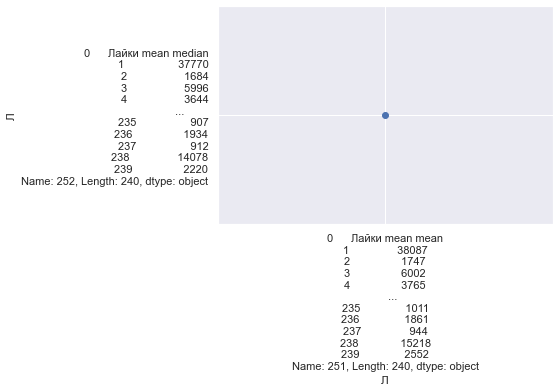

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans

x_axis = all_features[251]  # Sepal Length
y_axis = all_features[252]  # Sepal Width

# Построение
plt.xlabel(x_axis.iloc[0][0])
plt.ylabel(y_axis.iloc[0][0])
plt.scatter(str(x_axis), str(y_axis))
plt.show()

In [35]:
sns_plot = sns.distplot(all_features['Лайки mean mean'])
fig = sns_plot.get_figure()






KeyError: 'Лайки mean mean'